In [11]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

In [13]:
IMG_SIZE = 224
IMG_CHANNEL = 3
BATCH_SIZE = 32
COLOR_MODE = 'rgb'

In [14]:
train_set = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Shenzhen_TB/train/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)

dev_set = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Shenzhen_TB/train/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

test_set = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Shenzhen_TB/test/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 532 files belonging to 2 classes.
Using 426 files for training.
Found 532 files belonging to 2 classes.
Using 106 files for validation.
Found 130 files belonging to 2 classes.


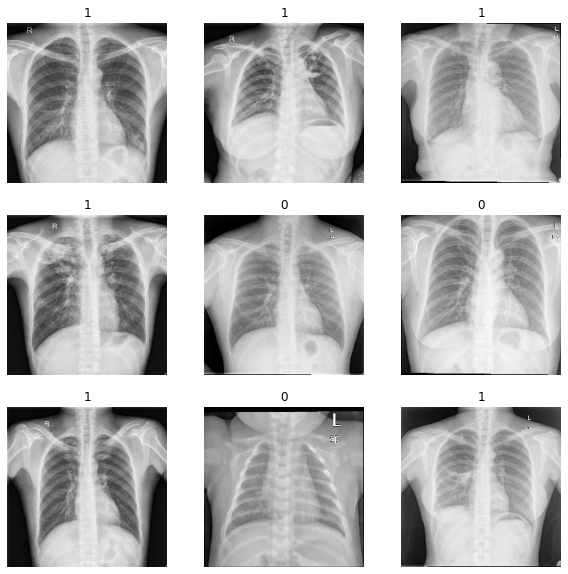

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dev_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        plt.title(int(labels[i]))
        plt.axis("off")

In [16]:
!pip install livelossplot

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

monitor_val_acc = EarlyStopping(monitor = 'val_loss', 
                                patience = 5)

In [18]:
# MobileNetV3 
from keras.models import Model
from keras.layers import Flatten, Dense
from tensorflow.keras.applications.densenet import DenseNet121

dense_net = DenseNet121(include_top=False, input_shape=(224, 224, 3))

# breeze all VGG previous layers
for layer in dense_net.layers:
	layer.trainable = False

flatten = Flatten()(dense_net.layers[-1].output)
fc1 = Dense(128, activation='relu')(flatten)
out = Dense(1, activation='sigmoid')(fc1)

model = Model(inputs=dense_net.inputs, outputs=out)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                           

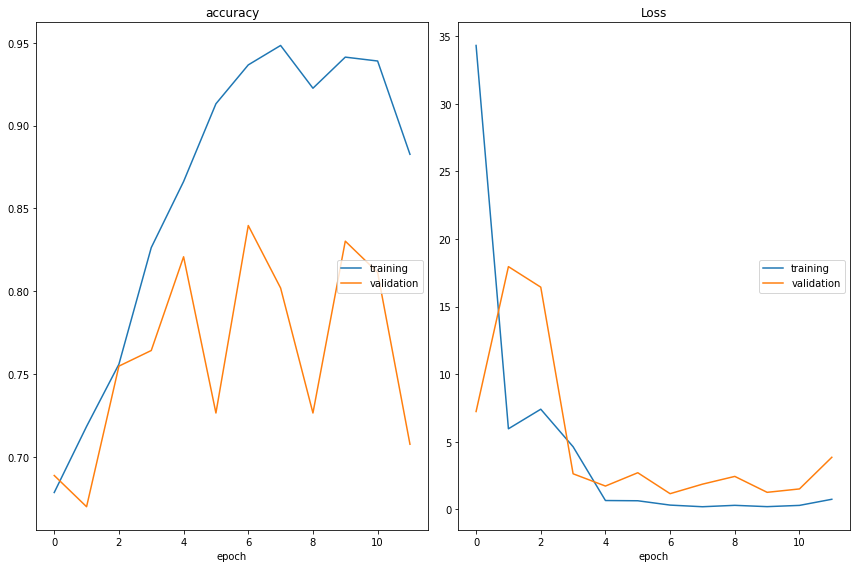

accuracy
	training         	 (min:    0.678, max:    0.948, cur:    0.883)
	validation       	 (min:    0.670, max:    0.840, cur:    0.708)
Loss
	training         	 (min:    0.193, max:   34.325, cur:    0.744)
	validation       	 (min:    1.158, max:   17.960, cur:    3.852)
14/14 [==============================] - 18s 667ms/step - loss: 0.7445 - accuracy: 0.8826 - val_loss: 3.8522 - val_accuracy: 0.7075


In [19]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(train_set, 
           epochs = 200,
           batch_size=1024,
           callbacks=[PlotLossesKeras(), monitor_val_acc],
           validation_data = dev_set)

In [20]:
model.save('/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Models/Models for Shenzhen/model_densenet.h5')